In [1]:
pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=0fa38d6591bc96da3a2f203430aa35c990acfa4a5bed592bf1a97e2950157ff8
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
pip show face_recognition

Name: face-recognition
Version: 1.3.0
Summary: Recognize faces from Python or from the command line
Home-page: https://github.com/ageitgey/face_recognition
Author: Adam Geitgey
Author-email: ageitgey@gmail.com
License: MIT license
Location: /usr/local/lib/python3.10/dist-packages
Requires: Click, dlib, face-recognition-models, numpy, Pillow
Required-by: 


In [3]:
import os
import face_recognition

In [4]:
pip install opencv-python

In [5]:
import cv2
import face_recognition

# Path to your input photo
photo_filename = "/content/kutre.jpeg"

# Load the input photo
photo_image = cv2.imread(photo_filename)

# Convert the color format from BGR to RGB
photo_image_rgb = cv2.cvtColor(photo_image, cv2.COLOR_BGR2RGB)

# Detect faces in the input photo
face_locations = face_recognition.face_locations(photo_image_rgb)

# Extract feature encodings for each face in the input photo
face_encodings = face_recognition.face_encodings(photo_image_rgb, face_locations)

# Ensure that exactly one face is detected in the input photo
if len(face_encodings) == 1:
    # Retrieve the feature encoding of the face
    input_encoding = face_encodings[0]
    print("Feature encoding extracted successfully.")
else:
    print("Error: Could not detect a single face in the input photo.")

# Store the feature encoding in a list
input_encodings_list = [input_encoding]

Feature encoding extracted successfully.


In [6]:
input_encodings_list

[array([-0.18179838,  0.08558932, -0.01457429, -0.05382638, -0.05629568,
        -0.03566069,  0.01611683, -0.12956786,  0.24780999, -0.15041214,
         0.16968182, -0.04625387, -0.13151026, -0.06307457, -0.05221946,
         0.06048269, -0.08917385, -0.17490529, -0.12129685, -0.11397675,
         0.03565549, -0.04225498, -0.00600942,  0.10103779, -0.21656366,
        -0.32661602, -0.07720421, -0.08904465,  0.12663147, -0.1066888 ,
        -0.0336795 ,  0.05611008, -0.24717356, -0.10229363, -0.03474942,
         0.09990926,  0.0509277 ,  0.045524  ,  0.20097062, -0.03297951,
        -0.20131034, -0.00817364,  0.04562443,  0.28441384,  0.17312114,
         0.00055339, -0.04095824, -0.08593042,  0.09607677, -0.20971394,
         0.14689034,  0.1273195 ,  0.09497504,  0.0529909 ,  0.10510248,
        -0.11049987, -0.01890409,  0.14612232, -0.17866296,  0.06731562,
         0.06119478,  0.02028855, -0.07445291, -0.06455371,  0.17618093,
         0.12959141, -0.10207544, -0.10139912,  0.1

In [7]:
import cv2
import time
import math
import face_recognition

In [ ]:
# video_path = '/content/3rd_video.mp4'
# video = cv2.VideoCapture(video_path)

In [ ]:
# frames_with_faces = []
# face_encodings = []

In [ ]:
# frame_rate = 1

In [ ]:
# fps = video.get(cv2.CAP_PROP_FPS)
# total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
# frame_interval = math.ceil(fps * frame_rate)

In [ ]:
# frame_count = 0

In [ ]:
# while True:
#     # Read the next frame
#     ret, frame = video.read()

#     # Check if the frame was successfully read
#     if not ret:
#         break

#     # Increment the frame count
#     frame_count += 1

#     # Skip frames until the desired frame interval is reached
#     if frame_count % frame_interval != 0:
#         continue

#     # Denoise the frame
#     denoised_frame = cv2.fastNlMeansDenoisingColored(frame, None, 10, 10, 7, 21)

#     # Convert the frame to grayscale for face detection
#     gray_frame = cv2.cvtColor(denoised_frame, cv2.COLOR_BGR2GRAY)

#     # Perform face detection on the frame
#     face_locations = face_recognition.face_locations(gray_frame)

#     # If at least one face is detected, store the frame and extract face encodings
#     if len(face_locations) > 0:
#         frames_with_faces.append(frame)
#         face_encoding = face_recognition.face_encodings(frame, face_locations)[0]
#         face_encodings.append(face_encoding)
# # Release the video capture object
# video.release()

In [19]:
import cv2
import face_recognition

# Load the video file
video_path = "/content/3rd_video.mp4"
cap = cv2.VideoCapture(video_path)

# Set the desired frame rate for frame extraction
frame_rate = 1  # Extract one frame every second
frame_interval = int(cap.get(cv2.CAP_PROP_FPS) / frame_rate)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Lists to store the frame encodings and timestamps
frame_encodings = []
timestamps = []
frame_number = []
frame_images = []

# Iterate over the frames and extract encodings
for frame_count in range(total_frames):
    # Read the frame
    ret, frame = cap.read()

    # Extract the frame timestamp
    timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0

    # Check if it's time to extract a frame
    if frame_count % frame_interval == 0:
        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces in the frame
        face_locations = face_recognition.face_locations(frame_rgb)

        # Ensure there is exactly one face in the frame
        if len(face_locations) == 1:
            # Extract the face encoding
            face_encoding = face_recognition.face_encodings(frame_rgb, face_locations)[0]

            # Append the face encoding and timestamp to the lists
            frame_encodings.append(face_encoding)
            timestamps.append(timestamp)
            frame_number.append(frame_count)
            frame_images.append(frame)

        # Print the frame number and timestamp
        # print("Frame:", frame_count, "Timestamp:", timestamp)
        frame_number
        timestamps
# Release the video capture
cap.release()

In [10]:
frame_number

[203, 435, 464, 783, 812, 957, 1131]

In [11]:
timestamps

[6.875222222222223,
 14.58058888888889,
 15.543711111111111,
 26.205333333333336,
 27.168455555555557,
 31.984344444444446,
 37.820011111111114]

In [20]:
frame_images

[array([[[  0,   0,   1],
         [  0,   0,   1],
         [  0,   0,   1],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[165, 172, 173],
         [165, 172, 173],
         [165, 172, 173],
         ...,
         [225, 222, 221],
         [225, 222, 221],
         [225, 222, 221]],
 
        [[188, 199, 200],
         [176, 187, 188],
         [161, 172, 173],
         ...,
         [213, 216, 214],
         [213, 216, 214],
         [213, 216, 214]],
 
        ...,
 
        [[140, 167, 188],
         [140, 167, 188],
         [140, 167, 188],
         ...,
         [ 56,  70,  84],
         [ 55,  69,  83],
         [ 55,  69,  83]],
 
        [[142, 169, 190],
         [142, 169, 190],
         [142, 169, 190],
         ...,
         [ 58,  70,  82],
         [ 57,  69,  81],
         [ 57,  69,  81]],
 
        [[  0,   6,  27],
         [  0,   6,  27],
         [  0,   6,  27],
         ...,
         [  0,   1,  13],
  

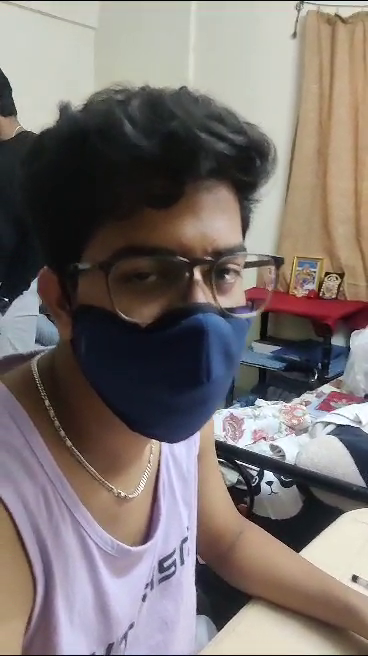

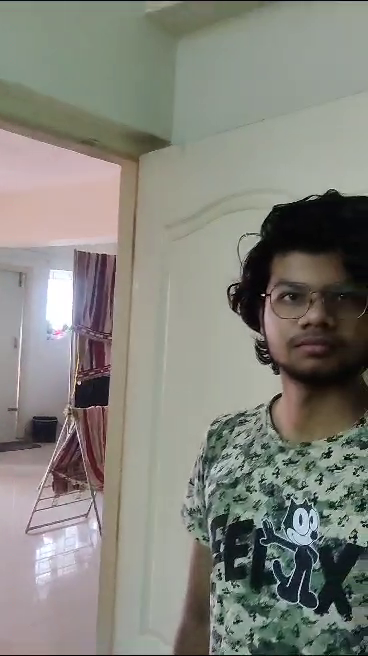

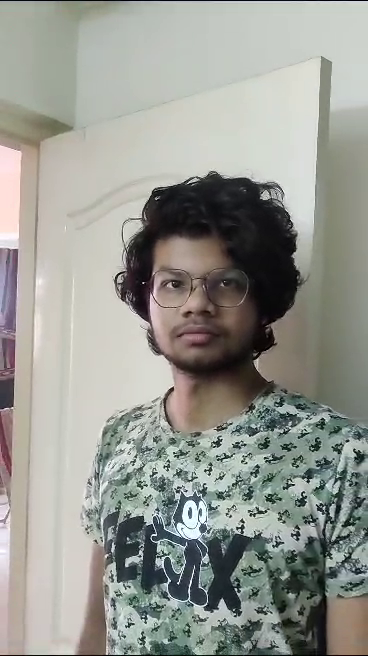

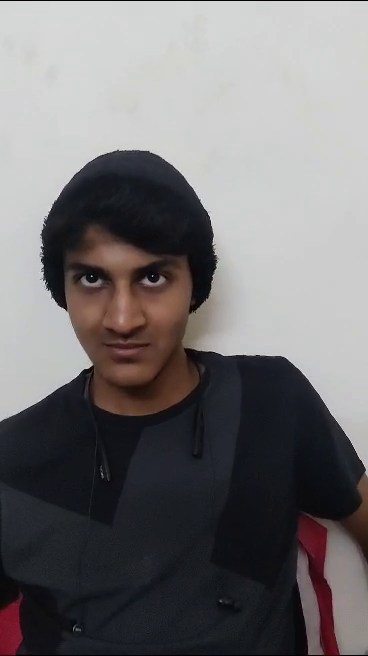

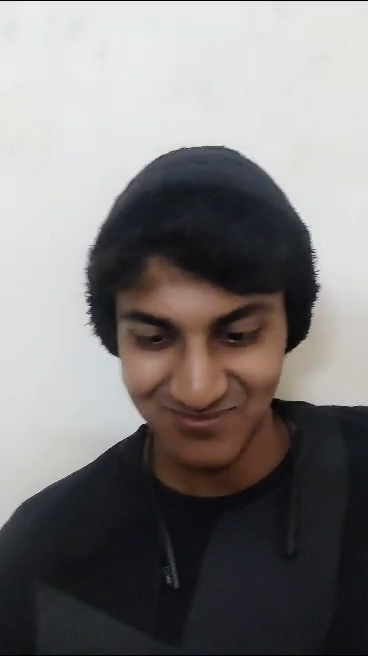

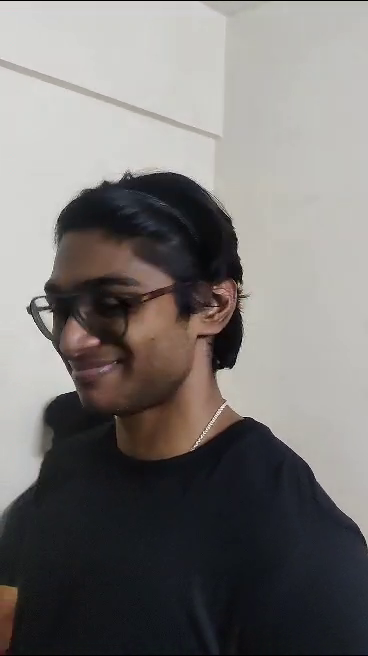

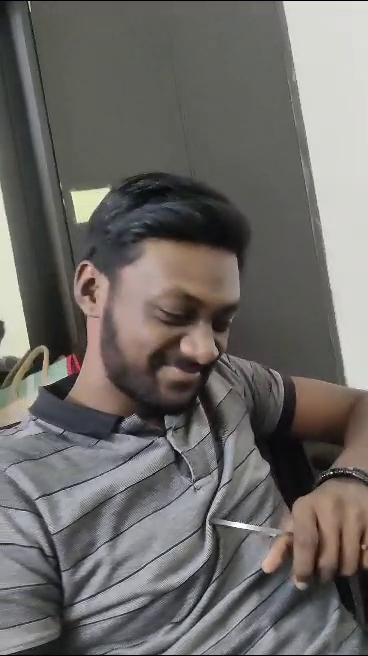

In [25]:
import cv2
from google.colab.patches import cv2_imshow

# Iterate over the frames and display each frame
for frame in frame_images:
    cv2_imshow(frame)

In [ ]:
# face_encodings

[array([-0.15048842,  0.09199583,  0.05010016,  0.00761717, -0.03248487,
        -0.05263153,  0.0158889 , -0.11621968,  0.13219163, -0.07110688,
         0.26522899, -0.01143619, -0.15400696, -0.2017566 ,  0.05795816,
         0.12645882, -0.12313995, -0.09622924, -0.08374478, -0.08755964,
         0.00275924, -0.05901132,  0.08931345,  0.08681432, -0.08093849,
        -0.39879918, -0.0548527 , -0.15784708,  0.0613044 , -0.03356588,
        -0.00503236,  0.07898915, -0.16762877, -0.03942316, -0.04868415,
         0.13429371, -0.03734089, -0.02987389,  0.2129045 , -0.07301793,
        -0.14319818, -0.11954626,  0.02113291,  0.2257992 ,  0.23683284,
        -0.02025799,  0.05219083, -0.00641242,  0.08758862, -0.17736289,
         0.01683103,  0.09495639,  0.08784499,  0.00859663,  0.05872709,
        -0.07402185,  0.00679994,  0.02663934, -0.18712196, -0.0402037 ,
         0.00489396, -0.11123578, -0.15064618, -0.04206042,  0.21590231,
         0.14936495, -0.05543863, -0.13563795,  0.1

In [12]:
frame_encodings

[array([-1.84246093e-01,  7.52653256e-02,  1.00294024e-01,  9.03126784e-03,
        -5.88808507e-02, -1.08134404e-01,  7.93591514e-03, -8.36030543e-02,
         1.61092177e-01, -8.64838809e-02,  2.24872038e-01, -3.50752808e-02,
        -1.94421113e-01, -8.49008411e-02, -5.85645251e-02,  7.78765380e-02,
        -1.26723111e-01, -9.03399289e-02, -4.15745154e-02, -1.33839220e-01,
         3.41270044e-02, -2.75277998e-02, -2.80548632e-03,  3.03000659e-02,
        -5.35555184e-02, -3.10909331e-01, -8.35231394e-02, -1.99439049e-01,
         6.73672333e-02, -1.11723632e-01, -3.21930870e-02,  2.37732381e-02,
        -1.12044998e-01, -9.19148847e-02, -9.79918391e-02,  3.62442881e-02,
        -6.98529184e-04, -3.83322164e-02,  2.18092471e-01, -1.20112263e-02,
        -1.22327417e-01, -8.66808742e-02, -3.10302526e-02,  3.13598990e-01,
         1.88603535e-01,  1.22619905e-02, -1.45461634e-02,  1.19532645e-02,
         1.06229894e-01, -2.53794849e-01,  3.30288894e-02,  1.07841238e-01,
         8.7

In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Convert the input photo encoding to numpy array
input_encoding = np.array(input_encoding)

# Initialize a list to store the cosine similarities
similarities = []

In [13]:
input_encoding

array([-0.18179838,  0.08558932, -0.01457429, -0.05382638, -0.05629568,
       -0.03566069,  0.01611683, -0.12956786,  0.24780999, -0.15041214,
        0.16968182, -0.04625387, -0.13151026, -0.06307457, -0.05221946,
        0.06048269, -0.08917385, -0.17490529, -0.12129685, -0.11397675,
        0.03565549, -0.04225498, -0.00600942,  0.10103779, -0.21656366,
       -0.32661602, -0.07720421, -0.08904465,  0.12663147, -0.1066888 ,
       -0.0336795 ,  0.05611008, -0.24717356, -0.10229363, -0.03474942,
        0.09990926,  0.0509277 ,  0.045524  ,  0.20097062, -0.03297951,
       -0.20131034, -0.00817364,  0.04562443,  0.28441384,  0.17312114,
        0.00055339, -0.04095824, -0.08593042,  0.09607677, -0.20971394,
        0.14689034,  0.1273195 ,  0.09497504,  0.0529909 ,  0.10510248,
       -0.11049987, -0.01890409,  0.14612232, -0.17866296,  0.06731562,
        0.06119478,  0.02028855, -0.07445291, -0.06455371,  0.17618093,
        0.12959141, -0.10207544, -0.10139912,  0.13072045, -0.20

In [ ]:
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# # Convert the input photo encoding to numpy array
# input_encoding = np.array(input_encoding).reshape(1, -1)

# # Initialize a list to store the cosine similarities
# similarities = []

# # Calculate the cosine similarity between input encoding and each frame encoding
# for frame_encoding in face_encodings:
#     frame_encoding = np.array(frame_encoding).reshape(1, -1)
#     similarity = cosine_similarity(input_encoding, frame_encoding)
#     similarities.append(similarity[0][0])

# # Print the similarities
# print(similarities)

[0.9009877607877539, 0.8999604725266981, 0.8970992471531903, 0.9106949823234486]


In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Convert the input photo encoding to numpy array
input_encoding = np.array(input_encoding).reshape(1, -1)

# Initialize variables to store the best match information
best_match_index = -1
best_match_similarity = -1
best_match_timestamp = None
best_match_frame_number = None

# Calculate the cosine similarity between input encoding and each frame encoding
for i, frame_encoding in enumerate(frame_encodings):
    frame_encoding = np.array(frame_encoding).reshape(1, -1)
    similarity = cosine_similarity(input_encoding, frame_encoding)
    if similarity[0][0] > best_match_similarity:
        best_match_similarity = similarity[0][0]
        best_match_index = i

# Check if a best match is found
if best_match_index != -1:
    best_match_frame_number = frame_number[best_match_index]
    best_match_timestamp = timestamps[best_match_index]

# Print the best match information
print("Best Match Accuracy:", best_match_similarity)
print("Best Match Frame Number:", best_match_frame_number)
print("Best Match Timestamp:", best_match_timestamp)

Best Match Accuracy: 0.958017640945249
Best Match Frame Number: 783
Best Match Timestamp: 26.205333333333336


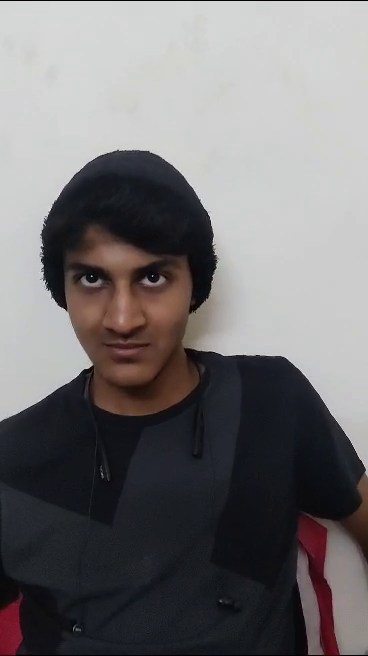

In [27]:
from google.colab.patches import cv2_imshow

# ...

if best_match_similarity > 0.9:
    # Retrieve the frame image corresponding to the best match
    best_match_frame_image = frame_images[best_match_index]

    # Display the frame image
    cv2_imshow(best_match_frame_image)


In [ ]:
# Set the similarity threshold
similarity_threshold = 0.90

In [ ]:
# Initialize variables for counting matches and total frames
match_count = 0
total_frames = len(similarities)

In [ ]:
# Iterate over the similarities and count the matches
for similarity in similarities:
    if similarity >= similarity_threshold:
        match_count += 1

In [ ]:
# Calculate the accuracy
accuracy = match_count / total_frames * 100

In [ ]:
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 50.00%
